### srt -> json

In [3]:
import re
import json
import os

def parse_srt(srt_text):
    pattern = re.compile(r'(\d+)\n(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})\n(.*?)\n', re.DOTALL)
    matches = pattern.findall(srt_text)

    data = []
    skip_patterns = [r'\[', r'\]', r'【', r'】']  # 定义需要跳过的字符模式列表

    for match in matches:
        id_, start, end, content = match
        if any(re.search(pattern, content) for pattern in skip_patterns):
            continue  # 如果包含跳过字符，跳过这部分

        speaker_lines = content.strip().split('\n')
        for speaker_line in speaker_lines:
            if speaker_line.strip():  # 忽略空行
                # 进一步拆分可能包含多个说话者的行
                sub_lines = re.split(r'(?<=[。！？])(?=[^。！？]*：)', speaker_line)
                for sub_line in sub_lines:
                    parts = re.split(r':|：|;|；', sub_line, maxsplit=1)
                    if len(parts) == 2:
                        speaker, sentence = parts
                    else:
                        speaker = ''
                        sentence = parts[0]
                    entry = {
                        'id': id_,
                        'start_time': start,
                        'end_time': end,
                        'speaker': speaker.strip(),
                        'sentence': sentence.strip()
                    }
                    data.append(entry)
    return data

def srt_to_json(srt_file_path):
    with open(srt_file_path, 'r', encoding='utf-8') as file:
        srt_text = file.read()
    parsed_data = parse_srt(srt_text)
    return json.dumps(parsed_data, ensure_ascii=False, indent=4)

def convert_srt_to_json_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".srt"):
                srt_file_path = os.path.join(root, file)
                json_data = srt_to_json(srt_file_path)
                json_file_path = os.path.splitext(srt_file_path)[0] + '.json'
                with open(json_file_path, 'w', encoding='utf-8') as json_file:
                    json_file.write(json_data)
                print(f'Converted {srt_file_path} to {json_file_path}')

# 调用函数，转换 `Subtitle` 目录下的所有 `.srt` 文件
convert_srt_to_json_in_directory("Subtitle")


Converted Subtitle/alice's group/Nov 22, 2021 1027 AM/GMT20211122-022751/GMT20211122-022751_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Nov 22, 2021 1027 AM/GMT20211122-022751/GMT20211122-022751_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's group/Jan 10, 2022 0351 PM/GMT20220110-075157_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Jan 10, 2022 0351 PM/GMT20220110-075157_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's group/Dec 7, 2021 0926 AM/GMT20211207-012644/GMT20211207-012644_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Dec 7, 2021 0926 AM/GMT20211207-012644/GMT20211207-012644_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's group/Mar 8, 2022 1102 AM/GMT20220308-030238/GMT20220308-030238_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Mar 8, 2022 1102 AM/GMT20220308-030238/GMT20220308-030238_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's

### srt -> json with duration

In [4]:
import re
import json
import os
from datetime import datetime, timedelta

def parse_srt(srt_text):
    pattern = re.compile(r'(\d+)\n(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})\n(.*?)\n', re.DOTALL)
    matches = pattern.findall(srt_text)

    data = []
    skip_patterns = [r'\[', r'\]', r'【', r'】']

    for match in matches:
        id_, start, end, content = match
        if any(re.search(pattern, content) for pattern in skip_patterns):
            continue

        start_time = datetime.strptime(start, '%H:%M:%S,%f')
        end_time = datetime.strptime(end, '%H:%M:%S,%f')

        # 如果 end_time 等于 start_time，则将 end_time 设置为 start_time + 0.5 秒
        if end_time == start_time:
            end_time = start_time + timedelta(seconds=0.5)

        duration = end_time - start_time
        duration_seconds = duration.total_seconds()
        duration_formatted = f"{duration_seconds:.3f}"

        speaker_lines = content.strip().split('\n')
        for speaker_line in speaker_lines:
            if speaker_line.strip():
                sub_lines = re.split(r'(?<=[。！？])(?=[^。！？]*：)', speaker_line)
                for sub_line in sub_lines:
                    parts = re.split(r':|：|;|；', sub_line, maxsplit=1)
                    if len(parts) == 2:
                        speaker, sentence = parts
                    else:
                        speaker = ''
                        sentence = parts[0]
                    entry = {
                        'id': id_,
                        'start_time': start,
                        'end_time': end_time.strftime('%H:%M:%S,%f')[:-3],
                        'duration': duration_formatted,
                        'speaker': speaker.strip(),
                        'sentence': sentence.strip()
                    }
                    data.append(entry)
    return data

def srt_to_json(srt_file_path):
    with open(srt_file_path, 'r', encoding='utf-8') as file:
        srt_text = file.read()
    parsed_data = parse_srt(srt_text)
    return json.dumps(parsed_data, ensure_ascii=False, indent=4)

def convert_srt_to_json_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".srt"):
                srt_file_path = os.path.join(root, file)
                json_data = srt_to_json(srt_file_path)
                json_file_path = os.path.splitext(srt_file_path)[0] + '.json'
                with open(json_file_path, 'w', encoding='utf-8') as json_file:
                    json_file.write(json_data)
                print(f'Converted {srt_file_path} to {json_file_path}')

# 调用函数，转换 `Subtitle` 目录下的所有 `.srt` 文件
convert_srt_to_json_in_directory("Subtitle")


Converted Subtitle/alice's group/Nov 22, 2021 1027 AM/GMT20211122-022751/GMT20211122-022751_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Nov 22, 2021 1027 AM/GMT20211122-022751/GMT20211122-022751_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's group/Jan 10, 2022 0351 PM/GMT20220110-075157_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Jan 10, 2022 0351 PM/GMT20220110-075157_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's group/Dec 7, 2021 0926 AM/GMT20211207-012644/GMT20211207-012644_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Dec 7, 2021 0926 AM/GMT20211207-012644/GMT20211207-012644_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's group/Mar 8, 2022 1102 AM/GMT20220308-030238/GMT20220308-030238_Recording_gvo_1280x720_with_audio.srt to Subtitle/alice's group/Mar 8, 2022 1102 AM/GMT20220308-030238/GMT20220308-030238_Recording_gvo_1280x720_with_audio.json
Converted Subtitle/alice's

### Duration statistics

Total count: 5356
GMT20211122-022751_Recording_gvo_1280x720_with_audio.json: 942
GMT20220110-075157_Recording_gvo_1280x720_with_audio.json: 746
GMT20211207-012644_Recording_gvo_1280x720_with_audio.json: 523
GMT20220308-030238_Recording_gvo_1280x720_with_audio.json: 1328
GMT20211123-022650_Recording.json: 1306
GMT20220110-023101_Recording_gvo_1280x720_with_audio.json: 511


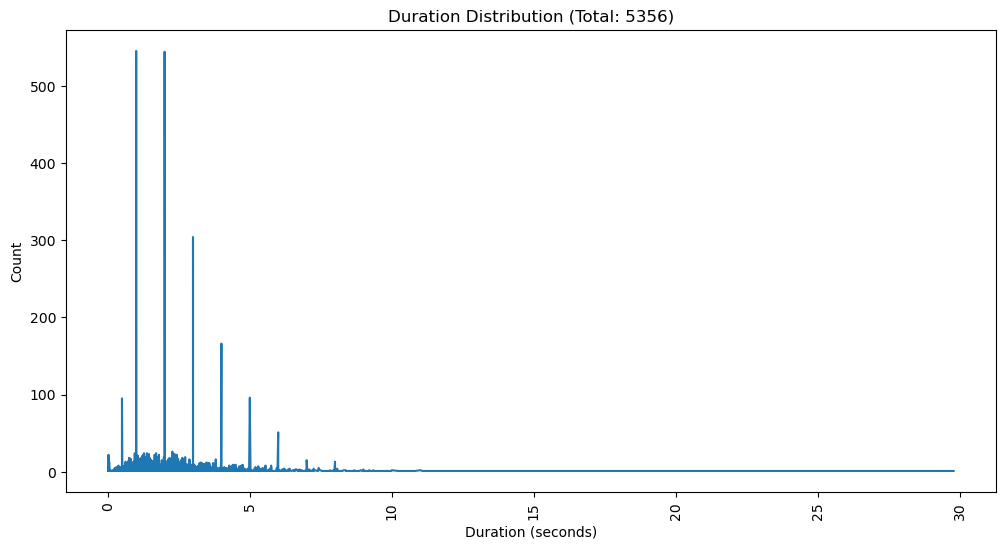

In [6]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt

def analyze_duration_distribution(directory):
    duration_counts = defaultdict(int)
    total_count = 0
    file_counts = {}
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    file_count = 0
                    for entry in data:
                        duration = float(entry['duration'])
                        duration_counts[round(duration, 3)] += 1
                        total_count += 1
                        file_count += 1
                    file_counts[file] = file_count

    duration_distribution = sorted(duration_counts.items(), key=lambda x: x[0])
    return duration_distribution, total_count, file_counts

def plot_duration_distribution(duration_distribution, total_count):
    durations, counts = zip(*duration_distribution)
    plt.figure(figsize=(12, 6))
    plt.plot(durations, counts)
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    plt.title(f'Duration Distribution (Total: {total_count})')
    plt.xticks(rotation=90)
    plt.show()

if __name__ == '__main__':
    directory = "Subtitle"
    duration_distribution, total_count, file_counts = analyze_duration_distribution(directory)

    print(f"Total count: {total_count}")
    for file, count in file_counts.items():
        print(f"{file}: {count}")

    plot_duration_distribution(duration_distribution, total_count)